In [1]:
import pandas as pd
from math import sqrt

In [2]:
user1 = pd.read_csv('user1_preprocessed_4.csv')
user2 = pd.read_csv('user2_preprocessed_4.csv')

user1['Time'] = pd.to_datetime(user1['Time'])
user2['Time'] = pd.to_datetime(user2['Time'])

print(user1)

                             Time     Event_Type    X    Y  PAM_Val  seq_num   
0      2021-09-10 11:59:42.515770           Move  518  381        4        0  \
1      2021-09-10 11:59:42.523750           Move  511  388        4        0   
2      2021-09-10 11:59:42.531727           Move  509  393        4        0   
3      2021-09-10 11:59:42.539705           Move  505  397        4        0   
4      2021-09-10 11:59:42.547684           Move  501  399        4        0   
...                           ...            ...  ...  ...      ...      ...   
844216 2021-09-14 18:31:29.481415           Move  424  676        1       32   
844217 2021-09-14 18:31:29.498370           Move  429  673        1       32   
844218 2021-09-14 18:31:29.514327           Move  432  671        1       32   
844219 2021-09-14 18:31:29.666919   Left_Pressed  432  671        1       32   
844220 2021-09-14 18:31:29.747703  Left_Released  432  671        1       32   

        delta_time  
0              0.0

In [3]:
print(user1.dtypes)

Time          datetime64[ns]
Event_Type            object
X                      int64
Y                      int64
PAM_Val                int64
seq_num                int64
delta_time           float64
dtype: object


In [4]:
def is_adjacent(ax, ay, bx, by):
    '''
    Returns boolean on if adjacent squares, and if not then also returns axis of largest non-adjacency (prioritizes 0 (x axis))
    '''
    dx = abs(ax - bx)
    dy = abs(ay - by)

    if dx > 1 or dy > 1:
        if dx >= dy:
            return False, 0
        else:
            return False, 1
    else:
        return True, None

def create_distance(user):
    user_grouped = user.groupby(by='seq_num')

    new_user = pd.DataFrame()
    for seq_num, seq in user_grouped:
        start_index = 0
        dist = []
        for index in range(1, len(seq.index)):
            x1 = seq['X'].iloc[index-1]
            y1 = seq['Y'].iloc[index-1]
            x2 = seq['X'].iloc[index]
            y2 = seq['Y'].iloc[index]

            dist.append(sqrt((x2-x1)**2 + (y2-y1)**2))

        seq_new = seq.assign(distance=[0] + dist)
        new_user = pd.concat([new_user, seq_new], axis=0)

    return new_user


user1 = create_distance(user1)
user2 = create_distance(user2)

print(user1)

                             Time     Event_Type    X    Y  PAM_Val  seq_num   
0      2021-09-10 11:59:42.515770           Move  518  381        4        0  \
1      2021-09-10 11:59:42.523750           Move  511  388        4        0   
2      2021-09-10 11:59:42.531727           Move  509  393        4        0   
3      2021-09-10 11:59:42.539705           Move  505  397        4        0   
4      2021-09-10 11:59:42.547684           Move  501  399        4        0   
...                           ...            ...  ...  ...      ...      ...   
844216 2021-09-14 18:31:29.481415           Move  424  676        1       32   
844217 2021-09-14 18:31:29.498370           Move  429  673        1       32   
844218 2021-09-14 18:31:29.514327           Move  432  671        1       32   
844219 2021-09-14 18:31:29.666919   Left_Pressed  432  671        1       32   
844220 2021-09-14 18:31:29.747703  Left_Released  432  671        1       32   

        delta_time  distance  
0       

In [24]:
print(user1[user1['delta_time'] > 900000]['distance'].value_counts().sort_index())

distance
0.000000     687
1.000000     225
1.414214      61
2.000000      77
2.236068      35
            ... 
30.149627      1
36.235342      1
42.520583      1
54.405882      1
83.000000      1
Name: count, Length: 61, dtype: int64


<AxesSubplot:xlabel='X', ylabel='Y'>

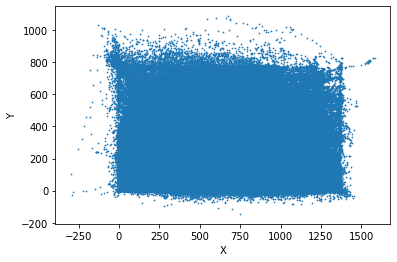

In [32]:
user1.plot.scatter(x='X', y='Y', s=0.5)

<AxesSubplot:xlabel='X', ylabel='Y'>

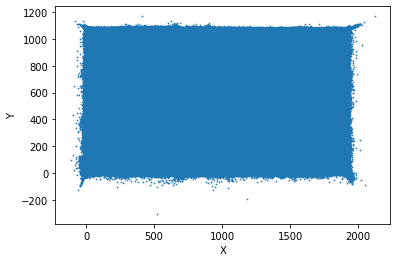

In [33]:
user2.plot.scatter(x='X', y='Y', s=0.5)

<AxesSubplot:xlabel='distance', ylabel='delta_time'>

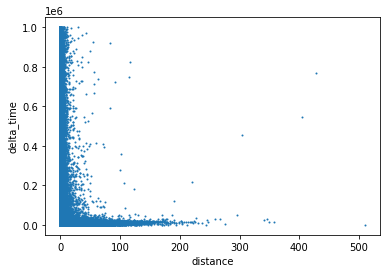

In [28]:
user1.plot.scatter(x='distance', y='delta_time', s=1)

<AxesSubplot:xlabel='distance', ylabel='delta_time'>

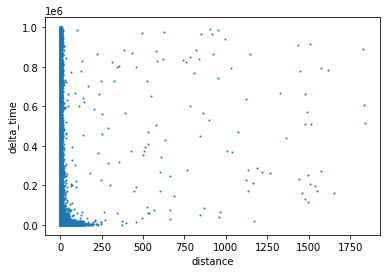

In [29]:
user2.plot.scatter(x='distance', y='delta_time', s=1)